In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from datetime import datetime

import pandas as pd
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets

In [3]:
!ls data

cases_country.csv
time_series_covid19_confirmed_US.csv
time_series_covid19_confirmed_global.csv
time_series_covid19_deaths_US.csv
time_series_covid19_deaths_global.csv
time_series_covid19_recovered_global.csv


After the global analysis, spend some time studying the COVID-19 outspread in a specific country. Uncover the crisis in different regions of the United States by analyzing the US time series dataset for deaths and confirmed cases.

In [5]:
us_confirmed_df = pd.read_csv('data/time_series_covid19_confirmed_US.csv')

us_confirmed_df.info()
us_confirmed_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Columns: 372 entries, UID to 1/16/21
dtypes: float64(3), int64(363), object(6)
memory usage: 9.5+ MB


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,4705,4770,4847,4879,4902,4970,4998,5075,5103,5154
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,14845,15052,15202,15327,15417,15572,15701,15841,16002,16176
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1614,1634,1648,1658,1663,1679,1685,1696,1712,1723


In [6]:
us_death_df = pd.read_csv('data/time_series_covid19_deaths_US.csv')

us_death_df.info()
us_death_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Columns: 373 entries, UID to 1/16/21
dtypes: float64(3), int64(364), object(6)
memory usage: 9.5+ MB


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,50,50,53,54,55,55,55,55,55,55
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,171,171,173,173,173,175,175,177,179,182
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,35,35,35,35,35,35,35,36,36,36


In [11]:
set(us_confirmed_df.columns.values) == set(us_death_df.columns.values)

False

In [12]:
set(us_confirmed_df.columns.values) - set(us_death_df.columns.values)
set(us_death_df.columns.values) - set(us_confirmed_df.columns.values)

set()

{'Population'}

In [14]:
us_confirmed_df.columns.tolist()[:10]

['UID',
 'iso2',
 'iso3',
 'code3',
 'FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Lat',
 'Long_']

In [24]:
cols_to_drop = [
    'UID',
    'iso2',
    'iso3',
    'code3',
    'FIPS',
    'Admin2',
    'Country_Region',
    'Lat',
    'Long_',
]

In [26]:
conf = (us_confirmed_df.drop(columns=cols_to_drop)
 .rename(columns={'Province_State': 'state'})
 .groupby('state').sum())

conf.iloc[:, -1].nlargest(10)

state
California        2959863
Texas             2112662
Florida           1560186
New York          1228867
Illinois          1064667
Ohio               821507
Georgia            809663
Pennsylvania       765489
Tennessee          680847
North Carolina     667826
Name: 1/16/21, dtype: int64

In [34]:
deaths = (us_death_df.drop(columns=cols_to_drop + ['Population'])
 .rename(columns={'Province_State': 'state'})
 .groupby('state').sum())

deaths.iloc[:, -1].nlargest(10)

state
New York         40806
California       33408
Texas            32428
Florida          24004
New Jersey       20414
Illinois         20020
Pennsylvania     19143
Michigan         14669
Massachusetts    13583
Georgia          12291
Name: 1/16/21, dtype: int64

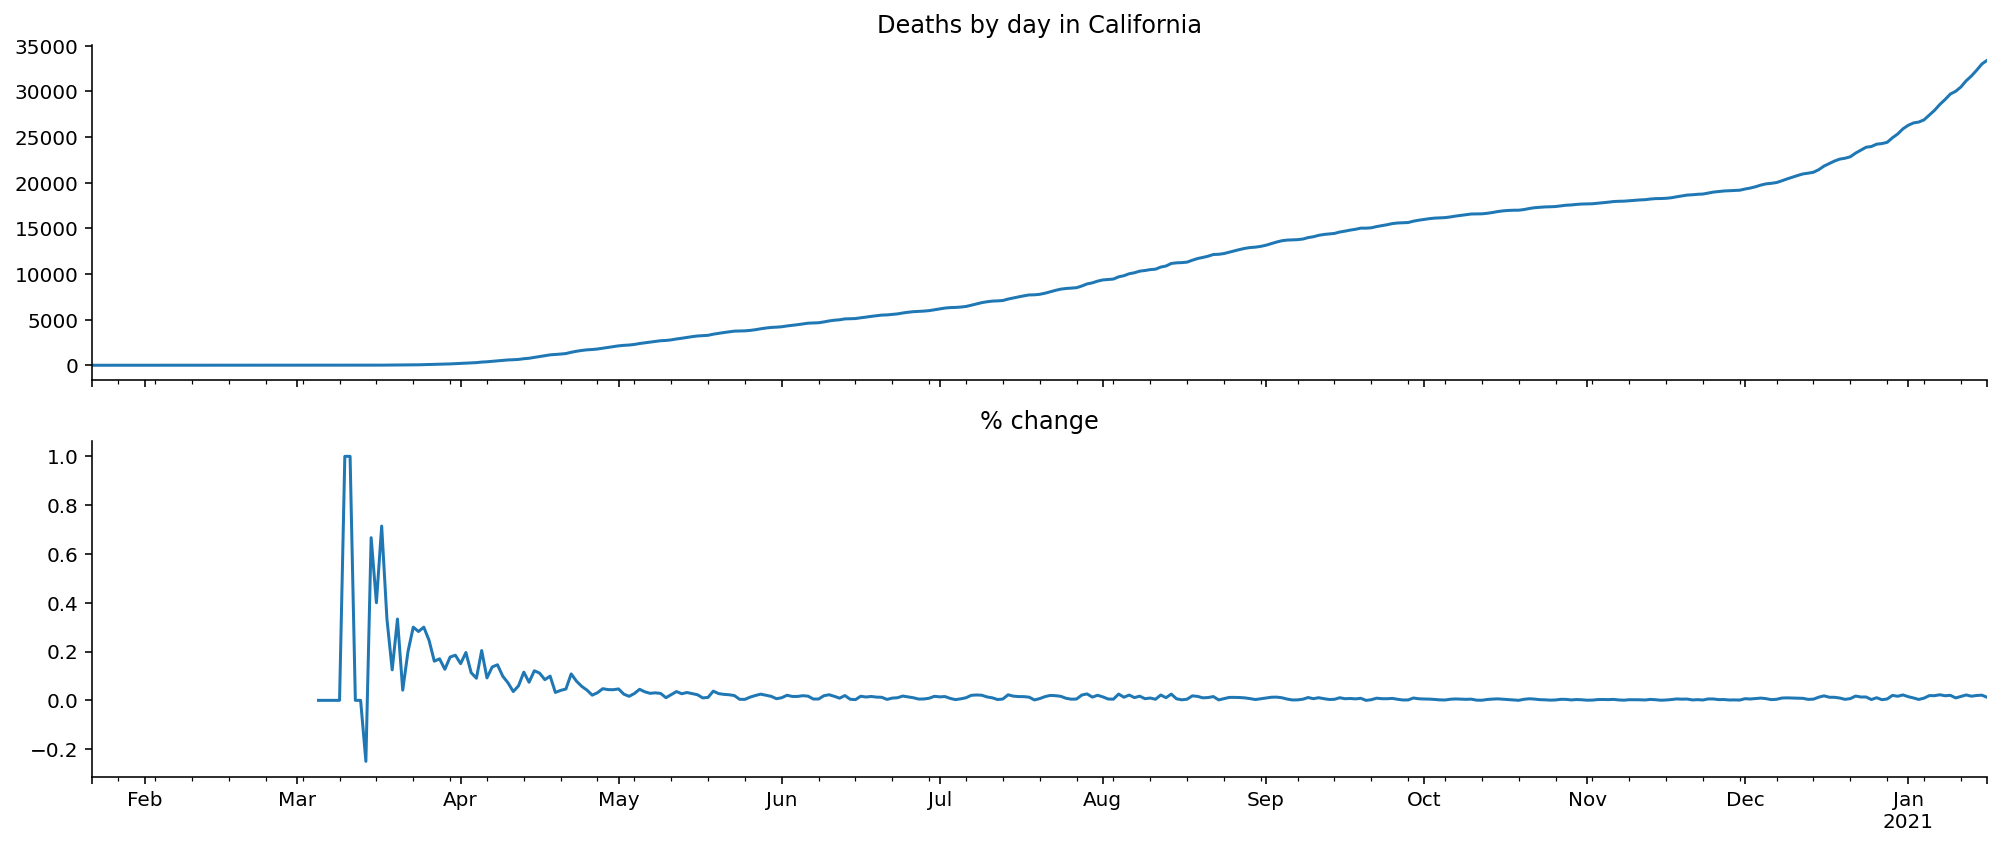

In [39]:
deaths_T = (deaths
 .transpose()
 .set_index(pd.to_datetime(death.columns.values)))

fig, axes = plt.subplots(nrows=2, figsize=(14, 6), sharex=True)
s = deaths_T['California']

_ = s.plot(rot=0, ax=axes[0], title='Deaths by day in California')
_ = s.pct_change().plot(rot=0, ax=axes[1], title='% change')
_ = axes[1].set_xlabel('')
sns.despine()
fig.tight_layout()

In [37]:
(s.pct_change().tail() * 100).round(1)

2021-01-12    2.2
2021-01-13    1.7
2021-01-14    2.0
2021-01-15    2.1
2021-01-16    1.2
Name: California, dtype: float64